# はんなりPython #9

# 今日はみんなでスクレイピングしてみましょう！

* ライブラリ：　requests, BeautifulSoup4, Pandas, time
* とりあえずやってみましょう

# 1.まずはAPIを使ってみましょう！
* 色々なテクニックを使ってデータを取得する前に、APIを探してみましょう。     
* もしAPIがあるなら、そこから簡単にデータが取れ、苦労する必要はありません。     
* まずは<span style='color: red; font-size: 20px;'>ライブラリrequests</span>を使って、仮想通貨取引所zaifのapiを使ってみます。     
* requestsのサイト(quickstart): http://docs.python-requests.org/en/master/user/quickstart/
* zaifのAPIのサイト: https://corp.zaif.jp/api-docs/　       


In [1]:
# まずはライブラリをインポートします
import requests
# APIを叩きます
r = requests.get('https://api.zaif.jp/api/1/last_price/btc_jpy')
# APIからの反応を見ます
r.status_code

200

## HTTPステータスコード
* wikipedia https://ja.wikipedia.org/wiki/HTTP%E3%82%B9%E3%83%86%E3%83%BC%E3%82%BF%E3%82%B9%E3%82%B3%E3%83%BC%E3%83%89      
* 2xxなら成功です！！！

In [2]:
# とりあえず中身を見る場合textを！！！！
r.text

'{"last_price": 715000.0}'

In [3]:
r.headers['content-type']

'application/json'

In [4]:
r.json()

{'last_price': 715000.0}

In [5]:
# 価格データだけを取る
r.json()['last_price']

715000.0

In [6]:
# 一秒おきにデータを取ってリストに入れる

import time

price = []
for t in range(10):
    r = requests.get('https://api.zaif.jp/api/1/last_price/btc_jpy')
    price.append(r.json()['last_price'])
    time.sleep(1)

In [7]:
print(price)

[715000.0, 715000.0, 715000.0, 714945.0, 714940.0, 714940.0, 714925.0, 714925.0, 714955.0, 714920.0]


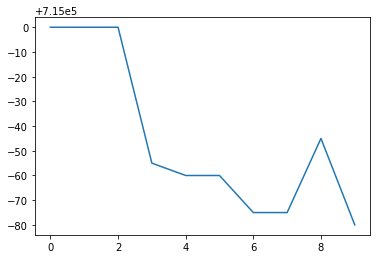

In [8]:
import pandas as pd
%matplotlib inline
pd.Series(price).plot()

___     
## 課題１
### zaifのAPIを使って、btc_jpyのtickerのデータを取ってみましょう。     
https://corp.zaif.jp/api-docs/　
### 取れたら"volume"のデータを抜き出しましょう。     
### 次に何秒間かのデータを作り、グラフを作ってみましょう！
___     

___    

# 2.1. 色々なページを徘徊させるその前に！
## 参考にしたサイト、本
* Stimulator Webスクレイピングする際のルールとPythonによる規約の読み込み     
https://vaaaaaanquish.hatenablog.com/entry/2017/12/01/064227      
* PythonによるWebスクレイピング       
https://www.oreilly.co.jp/books/9784873117614/      

### 駄目って言われていないか確認しよう！
* 著作権法、動産不法侵入ってのが適用されるみたいです。
* 著作権法はデータをそのまま公開しなければよいのかもしれない。     
<br>

#### Webスクレイピングが動産不法侵入に当たるのは次の3つの基準に違反した場合     　

1. 同意の欠如 / サ―ビス規約でスクレイパーの使用を特定的に禁止している場合      
2. 実害 / サーバをダウンさせたり、他のユーザーへのサービス能力を限定したりすると、害になる。     
3. 意図性 / コードを書いたなら何をするか分かっているはず。     
     
#### コンピューター犯罪取締法
1. 米国政府が所有するコンピュータへ故意に無権限でアクセスして情報を取得すること。
2. コンピュータに故意に無権限でアクセスして、金銭情報を得ること。
3. 米国政府が所有するコンピュータへ故意に無権限でアクセスして政府によるコンピュータ利用に影響を及ぼすこと。
4. 詐取目的で保護されたコンピュータ（protected computer）に故意に無権限でアクセスすること。
5. 故意に無権限でコンピュータにアクセスして当該コンピュータに損害を与えること。
6. 米国政府が使うコンピュータまたは州間あるいは国際取引に関係するコンピュータのパスワードあるいは認証情報を取得または不正取引すること。
7. 金銭もしくは「一切の有価物」を、保護されたコンピュータに対して損害を与えるもしくは損害を与えると脅すことによって強奪しようと試みること。
<br>
これはアメリカで日本ではもっと違うとの話もあり。

#### robot.txtとメタタグを確認する
* URLに/robots.txtを足すと、クローラーに対するサイトからの制限が見られる。     
* 書き方などに決まりはないものの、基本的にこれを守ればよい。     
* 検索エンジンのクローラー向け指示。     
* でも法律的なものではないので・・・     
* aタグのrelのnofollowチェック　==> あったら基本的にスクレイピング禁止    
* metaタグのnofollow、noindex、noarchive等もダメ！     
<br>
* グーグルによる表示の解説 / https://developers.google.com/search/reference/robots_meta_tag    
* https://www.nikkei.com/robots.txt      
* https://github.com/robots.txt     
* https://www.yahoo.co.jp/    
     
### ゆっくりやろう！
* いまのPCはスペック高いので本気でクローラーが走ると、サーバーへの負荷が半端ない     
* だからゆっくりやろう    
* 1秒に一回が目安とか言われるが、サイトによります。     
* HTTPのステータスコードも確認していたらよいのかなー。  

___     
# 2.2 WEBサイトからデータを取る
### APIがない場合はWEBサイトからデータを集めないといけなくなります
### 今回は日経新聞のウェブから日本の10年金利とそのサイトへのリンクを取ります。

In [9]:
from bs4 import BeautifulSoup

In [10]:
# 適当なサイトから目標とする値を取ってみる
r = requests.get('https://www.nikkei.com/')

bsobj = BeautifulSoup(r.text, 'lxml')
# パーサーの話： https://www.crummy.com/software/BeautifulSoup/bs4/doc/#installing-a-parser

## これでウェブページの全体が読み込まれました！

## 次に取りたい場所をクロームで調べましょう！      
* やり方　==>  取りたい場所を右クリック　==>  検証を押す
* それで取りたいデータのタグや属性を調べます。    
* それを指定してほしいデータを取ります。

In [11]:
bsobj.find('div', {'class':'m-miH01C_cell m-miH01C_cell_col5'})

<div class="m-miH01C_cell m-miH01C_cell_col5" data-id="JSID_JpnIndex"><a href="/markets/worldidx/chart/nk225/" title="9/21 9:24 "><span class="m-miH01C_exchange">日経平均</span><span class="m-miH01C_rate">23,827.78</span><span class="m-miH01C_comparison plus">+152.85</span></a></div>

In [12]:
bsobj.findAll('div', {'class':'m-miH01C_cell m-miH01C_cell_col5'})

[<div class="m-miH01C_cell m-miH01C_cell_col5" data-id="JSID_JpnIndex"><a href="/markets/worldidx/chart/nk225/" title="9/21 9:24 "><span class="m-miH01C_exchange">日経平均</span><span class="m-miH01C_rate">23,827.78</span><span class="m-miH01C_comparison plus">+152.85</span></a></div>,
 <div class="m-miH01C_cell m-miH01C_cell_col5" data-id="JSID_DowJones"><a href="/markets/kaigai/" title="9/20 17:20 終値"><span class="m-miH01C_exchange">NYダウ</span><span class="m-miH01C_rate">26,656.98</span><span class="m-miH01C_comparison plus">+251.22</span></a></div>,
 <div class="m-miH01C_cell m-miH01C_cell_col5" data-id="JSID_YenDollarExchange"><a href="/markets/kawase/" title="9/21 9:19"><span class="m-miH01C_exchange">ドル円</span><span class="m-miH01C_rate">112.48-49</span><span class="m-miH01C_comparison plus">+0.28</span></a></div>,
 <div class="m-miH01C_cell m-miH01C_cell_col5" data-id="JSID_NYCrudeOilRate"><a href="/markets/shohin/" title="9/20 20:14"><span class="m-miH01C_exchange">NY原油</span><span

In [13]:
bsobj.findAll('div', {'class':'m-miH01C_cell m-miH01C_cell_col5'})[4].a['href']

'/markets/kawase/page/?uah=DF_SEC8_C3_150'

In [14]:
bond_url='https://www.nikkei.com/' + bsobj.findAll('div', {'class':'m-miH01C_cell'})[4].a['href']
print(bond_url)

https://www.nikkei.com//markets/kawase/page/?uah=DF_SEC8_C3_150


<span style='color:red; font-size: 25px;'> spanが二つある場合、後ろにあるものをどうやって取るか分からなかったのでセレクターを変えて取った。2つ目を取る方法はあるか？</span>

In [15]:
bsobj.findAll('div', {'class':'m-miH01C_cell m-miH01C_cell_col5'})[4].span

<span class="m-miH01C_exchange">長期金利</span>

In [16]:
bsobj.findAll('div', {'class':'m-miH01C_cell m-miH01C_cell_col5'})[4]

<div class="m-miH01C_cell m-miH01C_cell_col5" data-id="JSID_JPNLongTermInterestRate"><a href="/markets/kawase/page/?uah=DF_SEC8_C3_150" title="--"><span class="m-miH01C_exchange">長期金利</span><span class="m-miH01C_rate">--</span><span class="m-miH01C_comparison stay">--</span></a></div>

In [17]:
bsobj.findAll('span', {'class':'m-miH01C_rate'})[4].get_text()

'--'

___    
## 課題2

#### 日経新聞のアクセスランキングのサイトから総合ランキングトップ10のニュースタイトル、ニュースのリンク、ニュースの日時を取りましょう。     
https://www.nikkei.com/access/
#### それを辞書に記録してみましょう。


# 3. 実行その前に
#### 3.1 try except
* Pythonではエラーが起きたとき例外が実行されます
* エラーが起きそうなところに例外処理を置いていておくと、エラーでクローラーが止まっていたというようなことがなくなります。

In [18]:
import requests
from bs4 import BeautifulSoup
import time

PAGE_URL_LIST = [
    'https://www.nikkei.com/',
    'https://www.nikkei.com/paper/',
    'https://www.nikkeii.com/stocks/',
    'https://www.nikkei.com/technology/'
]

for page_url in PAGE_URL_LIST:
    res = requests.get(page_url, timeout=5)
    bsobj = BeautifulSoup(res.text, 'lxml')
    print('PAGE URL: {}, HTTP STATUS: {}, PROCESS TIME: {}, H1: {}'.format(page_url, res.status_code, res.elapsed.total_seconds(), bsobj.find('h2').text))
    
    time.sleep(1)

PAGE URL: https://www.nikkei.com/, HTTP STATUS: 200, PROCESS TIME: 0.069031, H1: 
1日 0:00更新
-



AttributeError: 'NoneType' object has no attribute 'text'

In [26]:
import requests
from bs4 import BeautifulSoup
import time

PAGE_URL_LIST = [
    'https://www.nikkei.com/',
    'https://www.nikkei.com/paper/',
    'https://www.nikkeii.com/stocks/',
    'https://www.nikkei.com/technology/'
]

for page_url in PAGE_URL_LIST:
    try:
        res = requests.get(page_url, timeout=5)
        bsobj = BeautifulSoup(res.text, 'lxml')
        print('PAGE URL: {}, HTTP STATUS: {}, PROCESS TIME: {}, H1: {}'.format(page_url, res.status_code, res.elapsed.total_seconds(), bsobj.find('h2').text))
    except:
        pass
    time.sleep(1)

PAGE URL: https://www.nikkei.com/, HTTP STATUS: 200, PROCESS TIME: 0.084794, H1: 
1日 0:00更新
-

PAGE URL: https://www.nikkei.com/technology/, HTTP STATUS: 200, PROCESS TIME: 0.102749, H1: 
1日 0:00更新
-



In [27]:
PAGE_URL_LIST = [
    'https://www.nikkei.com/',
    'https://www.nikkei.com/paper/',
    'https://www.nikkeii.com/stocks/',
    'https://www.nikkei.com/technology/'
]

for page_url in PAGE_URL_LIST:
    try:
        res = requests.get(page_url, timeout=5)
        bsobj = BeautifulSoup(res.text, 'lxml')
        print('PAGE URL: {}, HTTP STATUS: {}, PROCESS TIME: {}, H2: {}'.format(page_url, res.status_code, res.elapsed.total_seconds(), bsobj.find('h3').text))
    except:
        print('[Something Wrong]: {}'.format(page_url))
    
    time.sleep(1)

PAGE URL: https://www.nikkei.com/, HTTP STATUS: 200, PROCESS TIME: 0.077925, H2: 
関空、旅客便通常ダイヤに　第１ターミナル全面再開
[Something Wrong]: https://www.nikkei.com/paper/
[Something Wrong]: https://www.nikkeii.com/stocks/
PAGE URL: https://www.nikkei.com/technology/, HTTP STATUS: 200, PROCESS TIME: 0.09998, H2: 記号は不要　推奨するパスワード、方針転換の理由 ［有料会員限定］


In [28]:
PAGE_URL_LIST = [
    'https://www.nikkei.com/',
    'https://www.nikkei.com/paper/',
    'https://www.nikkeii.com/stocks/',
    'https://www.nikkei.com/technology/'
]

for page_url in PAGE_URL_LIST:
    try:
        res = requests.get(page_url, timeout=5)
        bsobj = BeautifulSoup(res.text, 'lxml')
        print('PAGE URL: {}, HTTP STATUS: {}, PROCESS TIME: {}, H2: {}'.format(page_url, res.status_code, res.elapsed.total_seconds(), bsobj.find('h3').text))
    except AttributeError as e:
        print('{}: {}'.format(e, page_url))

    except:
        print('ERROR : {}'.format(page_url))
    
    time.sleep(1)

PAGE URL: https://www.nikkei.com/, HTTP STATUS: 200, PROCESS TIME: 0.081588, H2: 
関空、旅客便通常ダイヤに　第１ターミナル全面再開
'NoneType' object has no attribute 'text': https://www.nikkei.com/paper/
ERROR : https://www.nikkeii.com/stocks/
PAGE URL: https://www.nikkei.com/technology/, HTTP STATUS: 200, PROCESS TIME: 0.094857, H2: 記号は不要　推奨するパスワード、方針転換の理由 ［有料会員限定］


### 3.2 requests-html
* JavaScriptをサポート！！！     
https://html.python-requests.org/　　　　　
* でもjupyterではできないっぽい       
https://github.com/kennethreitz/requests-html/issues/173     
* Pycon2018の「Python出始めるウェブスクレイピング実践入門」で知る       
https://speakerdeck.com/sin_tanaka_21/pythondeshi-meruuebusukureipingushi-jian-ru-men?slide=1     
* 該当部分     
https://speakerdeck.com/sin_tanaka_21/pythondeshi-meruuebusukureipingushi-jian-ru-men?slide=70     
* requestsの作者の人が作ってる
* 普通のスクレイピングもrequests-htmlだけでできるのもポイント高いかも。      

In [29]:
from requests_html import HTMLSession
session = HTMLSession()
resp = session.get('https://pycon.jp/2018/event/sessions')
sel = '.session-summary h3'

elems = resp.html.find(sel)

print([i.text for i in elems])

[]


In [30]:
print('Atsushi Fukui' in resp.html.find('body', first=True).text)

False


In [31]:
session = HTMLSession()
r = session.get('https://pycon.jp/2018/event/sessions')
r.html.render(sleep=5)

sel = '.session-summary h3'
elems = r.htmlfind(sel)

print([i.text for i in elems])

RuntimeError: This event loop is already running